### Instructions

When running the notebook the first time, make sure to run all cells before making changes in the notebook. Hit Shift + Enter to run the selected cell or, in the top menu, click on: `Kernel` > `Restart & Run All` > `Restart and Run All Cells` to rerun the whole notebook. If you make any changes in a cell, rerun that cell.

In [1]:
# Import dependencies
import sys
sys.path.append('python/')
import numpy as np
import matplotlib.pyplot as plt
import rc_animation as rc_ani
import time
startTime = time.time()
from IPython.display import HTML

# Introduction to Rotation Curves

A rotation curve plots the rotational velocity of stars in a galaxy in terms of how far they are from the center, also known as the radius. Using photometric data of the luminous matter, a rotation curve of a galaxy can be created. It is used to estimate the mass inside a radius by equating the centrifugal force to the gravitational force:

\begin{equation}
\frac{mv^2}{r}=\frac{G M_{enc}(r)}{r^2}
\end{equation}
<br>
>where:<br>
        $v$ = rotational velocity<br>
        $G$ = gravitational constant<br>
        $M_{enc}(r)$ = enclosed mass as a function of radius<br>
        $r$ = radius or distance from the center of the galaxy
    <br>

Rotation curves of some spiral galaxies reveal a discrepancy in the measured and luminous mass. The relationship between the rotational velocity and mass is important to the study of Dark Matter. Plotting the rotation curves of edge-on spiral galaxies and their components can be used as a tool to find the Dark Matter rotation curve and its corresponding mass.

This notebook aims to demonstrate three different rotation curve types - rigid body (frisbee) rotation, planet-like rotation, and flat rotation.

### Rigid body (frisbee) rotation

The most straight forward rotation curve is that of a rigid body, i.e. a solid disk. The rotational velocity in this case is proportional to the radius of the rotating object, which can be denoted by:

\begin{equation}
v \propto r
\end{equation}

Because of this, the rigid body has a rotation curve that increases linearly with radius. To demonstrate this, let's create two arrays for the radius and the rotational velocity called `radiusRB` and `velocityRB`, respectively:

In [2]:
radiusRB = np.array([1,2,3,4,5])
velocityRB = np.array([0.1,0.2,0.3,0.4,0.5])

In [3]:
try: # Display animation
    display(HTML('<img src="images/rigidbody.gif" width=400>'))
except FileNotFoundError: #Make it first
    rc_ani.MakeAnimation(radiusRB,velocityRB,
                         100,1,                                         # time and dt
                         'images/rigidbody.gif','Rigid Body Rotation')  # file name and title of plot
    display(HTML('<img src="images/rigidbody.gif" width=400>'))

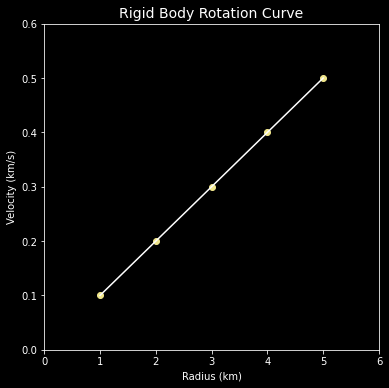

In [4]:
rc_ani.PlotRotationCurve(radiusRB,velocityRB,'Rigid Body Rotation Curve')

** SOME CONCLUDING SENTENCE FOR RIGID BODY ROTATION GOES HERE **

### Planet-like rotation

Non-rigid rotating bodies have more flexibility in their rotation. The most well-known example is the Keplerian model, which models orbital rotation in solar systems and planetary motion. This model has most of its mass concentrated in the center of the rotating object with satellites free to orbit around the center. With planet-like rotation, rotational velocity is inversely proportional to the square root of the radius:

\begin{equation}
v \propto \frac{1}{\sqrt{r}}
\end{equation}

One example is our Solar System with eight planets orbiting the Sun at the center. 

In [5]:
# Parameters
G = 6.67408e-11         # Gravitational constant (in m^3 kg^-1 s^-2)
AU = 1.496e11           # AU Astronomical Unit (in meters)

# Masses of the planets (M) in kg
M_Earth = 5.97e24      
M_Sun = 3.3e5*M_Earth
M_Mercury = 0.0553*M_Earth
M_Venus = 0.815*M_Earth
M_Mars = 0.107*M_Earth
M_Jupiter = 317.8*M_Earth
M_Saturn = 95.2*M_Earth
M_Uranus = 14.5*M_Earth
M_Neptune = 17.1*M_Earth

# Make array of masses
massesSS = np.array([M_Mercury,M_Venus,M_Earth,M_Mars,M_Jupiter,M_Saturn,M_Uranus,M_Neptune])

# Distances of planets from the Sun (r) in meters
r_Earth = AU
r_Mercury = 0.387*AU 
r_Venus = 0.723*AU
r_Mars = 1.52*AU
r_Jupiter = 5.20*AU
r_Saturn = 9.57*AU
r_Uranus = 19.17*AU
r_Neptune = 30.18*AU

# Make array of radii
radiusSS = np.array([r_Mercury,r_Venus,r_Earth,r_Mars,r_Jupiter,r_Saturn,r_Uranus,r_Neptune])

# Orbital velocity of planets (v) in m/s
v_Mercury = np.sqrt((G*M_Sun)/r_Mercury)
v_Venus = np.sqrt((G*(M_Sun+M_Mercury))/r_Venus)
v_Earth = np.sqrt((G*(M_Sun+M_Mercury+M_Venus))/r_Earth)
v_Mars = np.sqrt((G*(M_Sun+M_Mercury+M_Venus+M_Earth))/r_Mars)
v_Jupiter = np.sqrt((G*(M_Sun+M_Mercury+M_Venus+M_Earth+M_Mars))/r_Jupiter)
v_Saturn = np.sqrt((G*(M_Sun+M_Mercury+M_Venus+M_Earth+M_Mars+M_Jupiter))/r_Saturn)
v_Uranus = np.sqrt((G*(M_Sun+M_Mercury+M_Venus+M_Earth+M_Mars+M_Jupiter+M_Saturn))/r_Uranus)
v_Neptune = np.sqrt((G*(M_Sun+M_Mercury+M_Venus+M_Earth+M_Mars+M_Jupiter+M_Saturn+M_Uranus))/r_Neptune)

# Make array of velocities
velocitySS = np.array([v_Mercury,v_Venus,v_Earth,v_Mars,v_Jupiter,v_Saturn,v_Uranus,v_Neptune])

In [6]:
try: #Load the animation if it already exists
    HTML('<img src="images/solarsystem.gif width=400>') 
except FileNotFoundError: #And create it if it doesn't
    rc_ani.MakeAnimation(1e-3*radiusSS,1e-3*velocitySS,   # change distance unit to km, velocity unit to km/s
                         5e10,1e7,                        # time and dt
                         'images/solarsystem.gif','Planet-like Rotation',
                         1e8,1e8,                         # xlim and ylim
                         size=True,masses=massesSS)    
    # Display animation
    HTML('<img src="images/solarsystem.gif" width=400>')

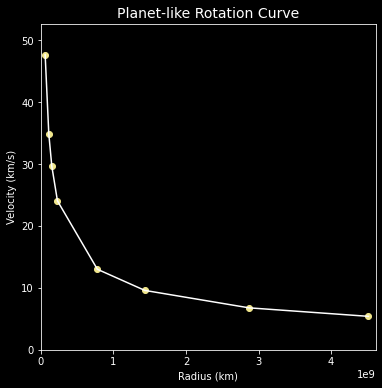

In [7]:
rc_ani.PlotRotationCurve(1e-3*radiusSS,1e-3*velocitySS,
                  'Planet-like Rotation Curve',
                  xlabel='Radius (km)',ylabel='Velocity (km/s)',
                  xlim=1e8,ylim=5)

** SOME CONCLUDING SENTENCE FOR PLANET-LIKE ROTATION GOES HERE **

### Flat rotation
 
The mass distribution of a galaxy based on luminous matter is similar to the mass distribution of the Keplerian model. Surprisingly, some of the rotation curves of galaxies are entirely different than the rotation curve of planetary motion. The curve for spiral galaxies quickly increases from the center to a relatively constant velocity: 

\begin{equation}
v \sim constant
\end{equation}

This type of rotation curve suggests there is more mass in the galaxy than we can "see". This 'missing mass' is what we call Dark Matter.

In [8]:
# Arbitrary distance and velocity for animation and plot
radiusFR = np.array([1,2,3,4,5,6,7])
velocityFR = np.array([0.1,0.24,0.29,0.31,0.31,0.31,0.31])

In [9]:
try:
    display(HTML('<img src="images/flatrotation.gif" width=400>'))
except FileNotFoundError:
    rc_ani.MakeAnimation(radiusFR,velocityFR,
                         200,1,                                       # time and dt
                         'images/flatrotation.gif','Flat Rotation')   # file name and title of plot
    # Display animation
    display(HTML('<img src="images/flatrotation.gif" width=400>'))

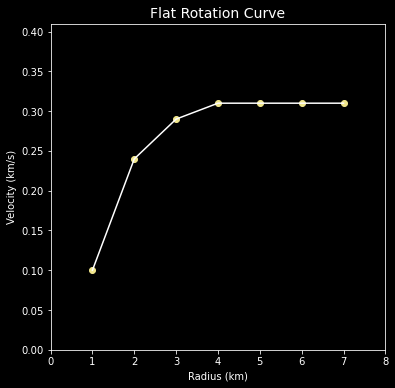

In [10]:
rc_ani.PlotRotationCurve(radiusFR,velocityFR,'Flat Rotation Curve')

** SOME CONCLUDING SENTENCE FOR PLANET-LIKE ROTATION GOES HERE **

In [11]:
# Calculation time
executionTime3 = (time.time() - startTime)
ttt3=executionTime3/60
print(f'Execution time: {ttt3:.2f} minutes')

Execution time: 0.01 minutes


### References
>Carroll, B. W., &amp; Ostlie, D. A. (2018). **An Introduction to Modern Astrophysics**. Cambridge University Press. <br><br>
>Williams, D. (2021, December 27). **Planetary Fact Sheet**. NASA. Retrieved February 27, 2022, from https://nssdc.gsfc.nasa.gov/planetary/factsheet/